### File to run poker experiments

###### Import the Poker Environment

In [1]:
from PokerEnv import *
import matplotlib.pyplot as plt
import random
from matplotlib import rcParams


In [2]:
rcParams['font.family'] = 'Times New Roman'
plt.rcParams.update({'font.size': 22})
rcParams['figure.figsize'] = 10, 10
games = []
error=[]

###### Run 10000 games of poker with random emotions and random powers

In [3]:
#8 Players
for j in range(10000):
    players_list = []
    for i in range(8):
        p = Player()
        emotion = random.randint(0,5)
        power = random.random()
        a = Agent(p,1000,emotion,power)
        players_list.append(a)
    env = PokerEnvironment(players_list)
    env.reset()
    env.pre_flop()
    env.flop()
    env.turn()
    env.river()
    env.showdown()
    games.append(env.game_stats)
    try:
        c  = 1/len(env.game_stats['win_emotion'])
    except:
        print(j)
        error=players_list
        break

###### Some analysis of the games

In [4]:
emotion_presence = {'fear':0,'happy':0,'no-emotion':0,'anger':0,'contempt':0,'normal':0}

In [5]:
for i in range(len(games)):
    game_s = games[i]
    lock = {'fear':0,'happy':0,'no-emotion':0,'anger':0,'contempt':0,'normal':0}
    for j in range(len(game_s['players'])):
        try:
            if lock[game_s['players'][j][1]] == 0:
                emotion_presence[game_s['players'][j][1]] +=1
                lock[game_s['players'][j][1]] = 1
        except:
            print(i)
        

In [6]:
emotion_presence

{'fear': 7646,
 'happy': 7706,
 'no-emotion': 7621,
 'anger': 7750,
 'contempt': 7673,
 'normal': 7727}

In [7]:
x=['fear','happy','no-emotion','angry','contempt','normal']
y = [x[1] for x in emotion_presence.items()]

<BarContainer object of 6 artists>

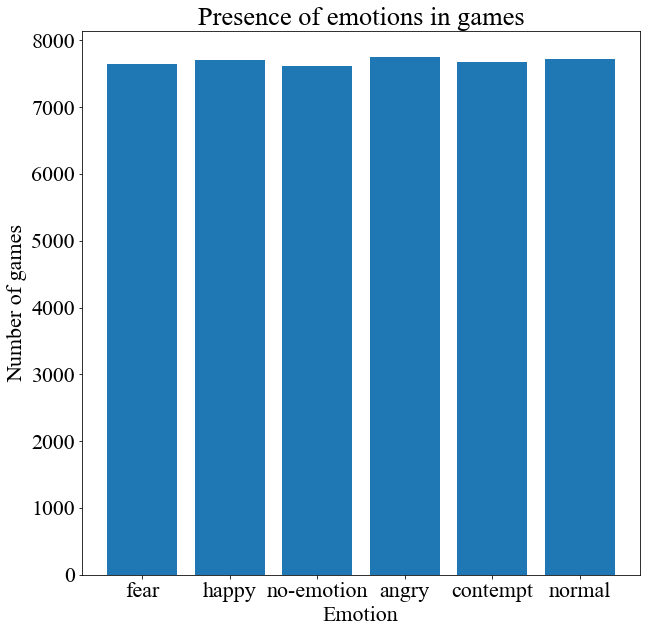

In [8]:
plt.title('Presence of emotions in games')
plt.xlabel('Emotion')
plt.ylabel('Number of games')
plt.bar(x,y)

###### Standard deviation 

In [9]:
import math
import numpy as np
avg = np.mean(y)
sd = math.sqrt(((y[0]-avg)**2+(y[1]-avg)**2+(y[2]-avg)**2+(y[3]-avg)**2+(y[4]-avg)**2+(y[5]-avg)**2)/5)

Standard deviation of above graph

In [11]:
sd

49.32105703111671

###### Calculate how many games each emotion won out of 10000 games

In [12]:
emotion_frequency = {'fear':0,'happy':0,'no-emotion':0,'anger':0,'contempt':0,'normal':0}

In [13]:
for i in range(len(games)):
    game_s = games[i]
    try:
        emotion_frequency[game_s['win_emotion']]+=1
    except:
        print(i)

###### We call it emotion frequency

In [14]:
emotion_frequency

{'fear': 1327,
 'happy': 2151,
 'no-emotion': 1235,
 'anger': 2474,
 'contempt': 1283,
 'normal': 1530}

###### Plot

In [15]:
x=['fear','happy','no-emotion','angry','contempt','normal']

In [16]:
y = [x[1] for x in emotion_frequency.items()]

<BarContainer object of 6 artists>

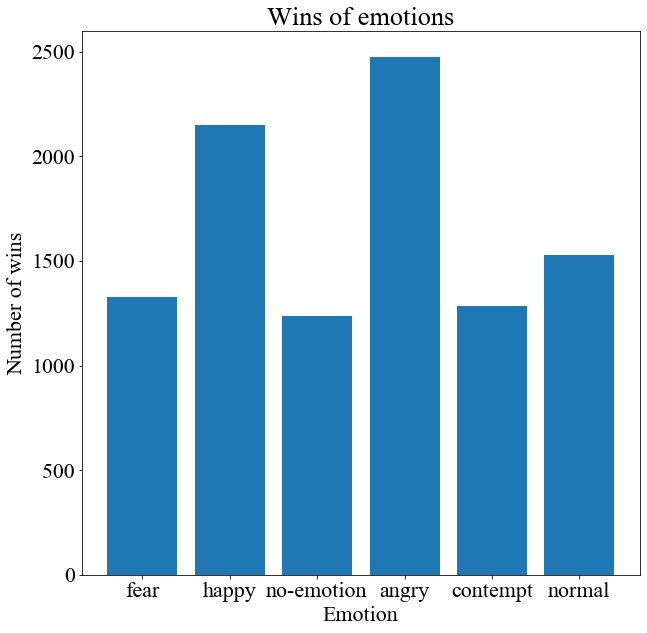

In [17]:
plt.title('Wins of emotions')
plt.xlabel('Emotion')
plt.ylabel('Number of wins')
plt.bar(x,y)

###### Calculate average power of each winning emotion

In [18]:
power_frequency = {'fear':0,'happy':0,'no-emotion':0,'anger':0,'contempt':0,'normal':0}

In [19]:
for i in range(len(games)):
    game_s = games[i]
    try:  
        power_frequency[game_s['win_emotion']]+=game_s['win_e_power']
    except Exception as e:
        print(e)
        break
        

In [20]:
for i in power_frequency:
    power_frequency[i] /= emotion_frequency[i]

In [21]:
power_frequency

{'fear': 0.48613383345292766,
 'happy': 0.5590916063707188,
 'no-emotion': 0.5112225850175512,
 'anger': 0.5961118879010233,
 'contempt': 0.473064043265723,
 'normal': 0.4941247510167984}

###### Plot

In [22]:
x=['fear','happy','no-emotion','angry','contempt','normal']
y = [x[1] for x in power_frequency.items()]

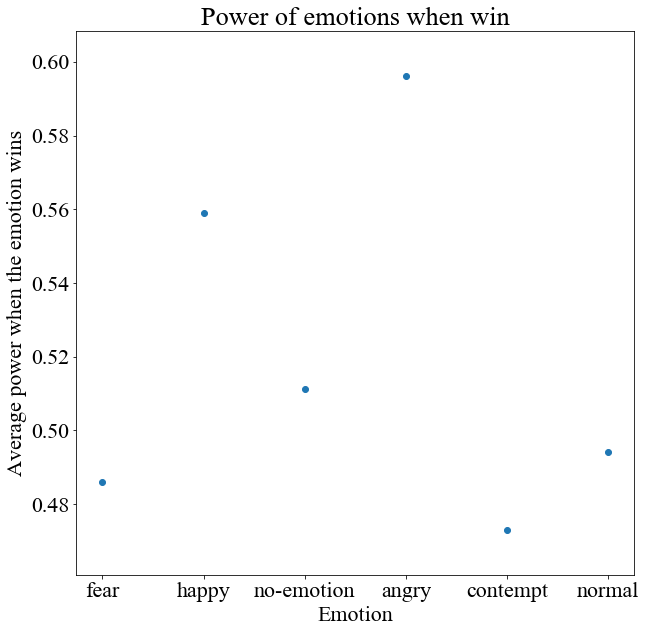

In [23]:
plt.title('Power of emotions when win')
plt.xlabel('Emotion')
plt.ylabel('Average power when the emotion wins')
plt.scatter(x,y)

###### Frequency of game endings for each turn

In [24]:
turn_frequency = {'pre_flop':0,'flop':0,'turn':0,'river':0,'showdown':0}

In [25]:
for i in range(len(games)):
    game_s = games[i]
    try:
        turn_frequency[game_s['last_round']]+=1   
    except Exception as e:
        print(e)
        break

In [26]:
turn_frequency

{'pre_flop': 788, 'flop': 694, 'turn': 1030, 'river': 1257, 'showdown': 6231}

In [27]:
x= ['pre_flop','flop','turn','river','showdown']
y = [x[1] for x in turn_frequency.items()]

<BarContainer object of 5 artists>

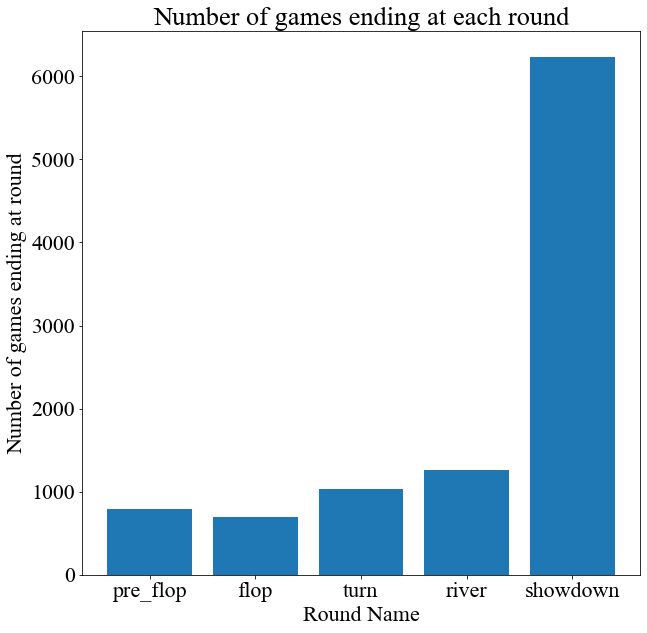

In [28]:
plt.title('Number of games ending at each round')
plt.xlabel('Round Name')
plt.ylabel('Number of games ending at round')
plt.bar(x,y)

###### Emotions that finished the game in pre_flop round

In [29]:
preflop_frequency = {'fear':0,'happy':0,'no-emotion':0,'anger':0,'contempt':0,'normal':0}

In [30]:
for i in range(len(games)):
    game_s = games[i]
    try:
        if game_s['last_round'] == 'pre_flop':
            preflop_frequency[game_s['win_emotion']]+=1
    except:
        print(i)

In [31]:
preflop_frequency

{'fear': 60,
 'happy': 235,
 'no-emotion': 20,
 'anger': 362,
 'contempt': 47,
 'normal': 64}

In [32]:
x=['fear','happy','no-emotion','angry','contempt','normal']
y = [x[1] for x in preflop_frequency.items()]

<BarContainer object of 6 artists>

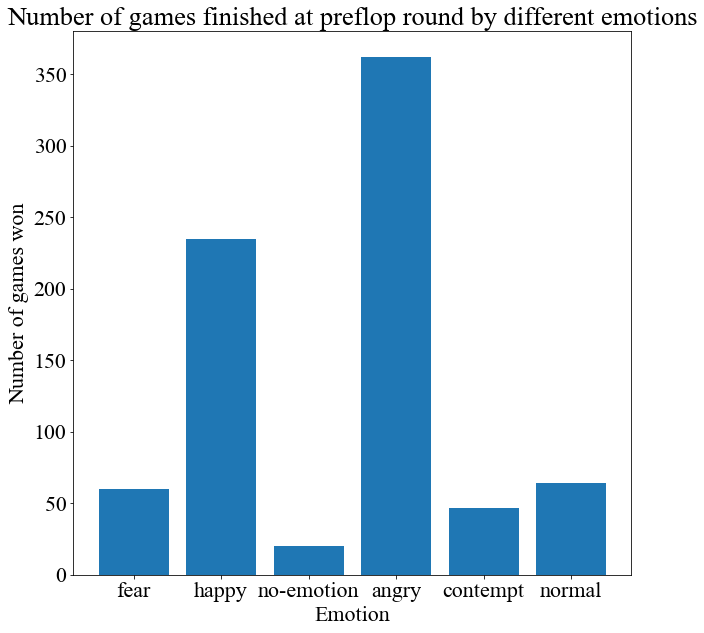

In [33]:
plt.title('Number of games finished at preflop round by different emotions')
plt.xlabel('Emotion')
plt.ylabel('Number of games won')
plt.bar(x,y)

###### Emotions that finished in flop round

<BarContainer object of 6 artists>

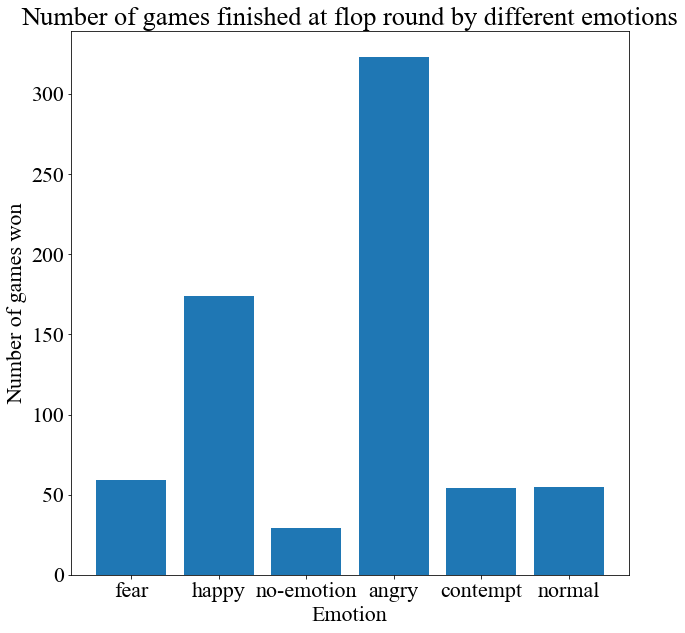

In [34]:
flop_frequency = {'fear':0,'happy':0,'no-emotion':0,'anger':0,'contempt':0,'normal':0}

for i in range(len(games)):
    game_s = games[i]
    try:
        if game_s['last_round'] == 'flop':
            flop_frequency[game_s['win_emotion']]+=1
    except:
        print(i)



x=['fear','happy','no-emotion','angry','contempt','normal']
y = [x[1] for x in flop_frequency.items()]

plt.title('Number of games finished at flop round by different emotions')
plt.xlabel('Emotion')
plt.ylabel('Number of games won')
plt.bar(x,y)

###### Emotions that finish in turn round

<BarContainer object of 6 artists>

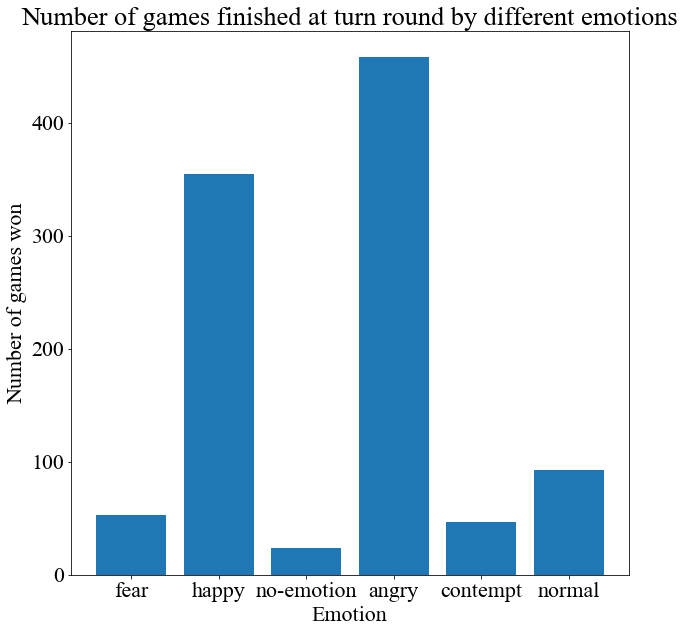

In [35]:
turn_frequency = {'fear':0,'happy':0,'no-emotion':0,'anger':0,'contempt':0,'normal':0}

for i in range(len(games)):
    game_s = games[i]
    try:
        if game_s['last_round'] == 'turn':
            turn_frequency[game_s['win_emotion']]+=1
    except:
        print(i)



x=['fear','happy','no-emotion','angry','contempt','normal']
y = [x[1] for x in turn_frequency.items()]

plt.title('Number of games finished at turn round by different emotions')
plt.xlabel('Emotion')
plt.ylabel('Number of games won')
plt.bar(x,y)

###### Emotions that finish in river round

<BarContainer object of 6 artists>

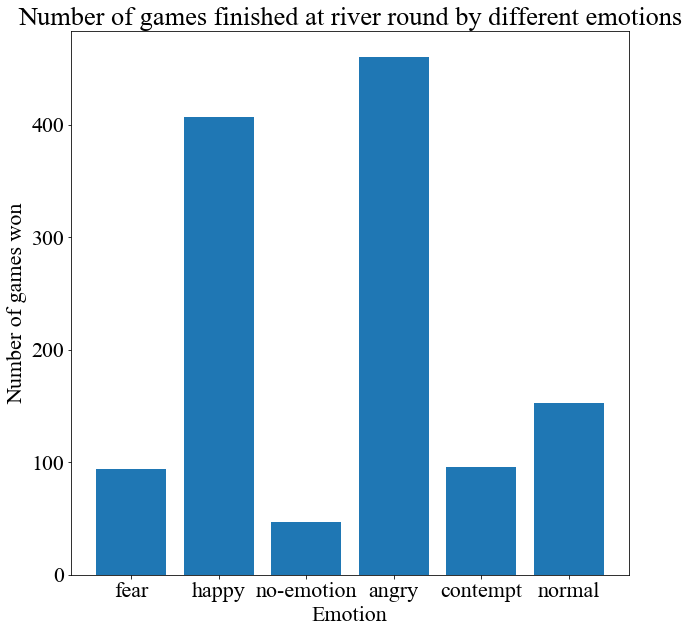

In [36]:
river_frequency = {'fear':0,'happy':0,'no-emotion':0,'anger':0,'contempt':0,'normal':0}

for i in range(len(games)):
    game_s = games[i]
    try:
        if game_s['last_round'] == 'river':
            river_frequency[game_s['win_emotion']]+=1
    except:
        print(i)



x=['fear','happy','no-emotion','angry','contempt','normal']
y = [x[1] for x in river_frequency.items()]

plt.title('Number of games finished at river round by different emotions')
plt.xlabel('Emotion')
plt.ylabel('Number of games won')
plt.bar(x,y)

###### Emotions that finished in showdown round

<BarContainer object of 6 artists>

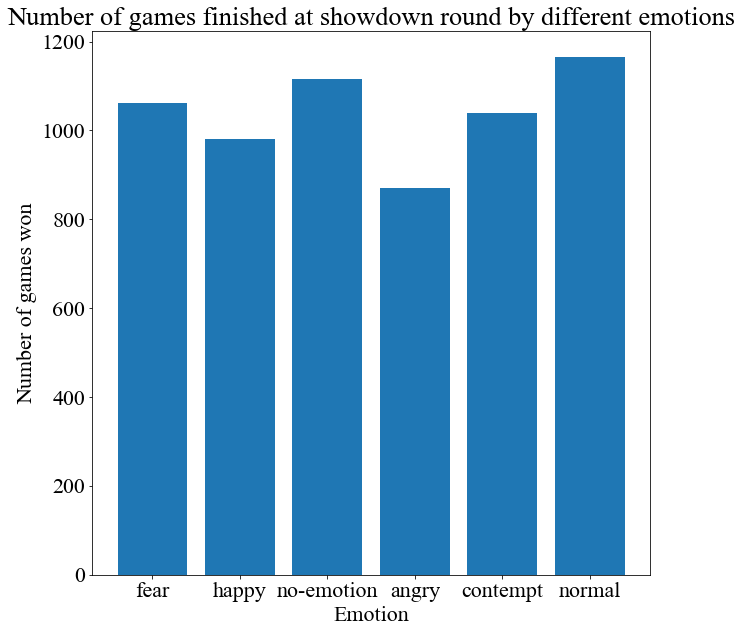

In [37]:
showdown_frequency = {'fear':0,'happy':0,'no-emotion':0,'anger':0,'contempt':0,'normal':0}

for i in range(len(games)):
    game_s = games[i]
    try:
        if game_s['last_round'] == 'showdown':
            showdown_frequency[game_s['win_emotion']]+=1
    except:
        print(i)



x=['fear','happy','no-emotion','angry','contempt','normal']
y = [x[1] for x in showdown_frequency.items()]

plt.title('Number of games finished at showdown round by different emotions')
plt.xlabel('Emotion')
plt.ylabel('Number of games won')
plt.bar(x,y)

###### Calculate remaining coins at the end of each game for each winning emotion

In [62]:
debt_amount = {'fear':0,'happy':0,'no-emotion':0,'anger':0,'contempt':0,'normal':0}

In [63]:
for i in range(len(games)):
    game_s = games[i]
    try:
        debt_amount[game_s['win_emotion']]+=game_s['win_amount']
    except Exception as e:
        print(e)
        break
        

In [64]:
for i in debt_amount:
    debt_amount[i] /= 10000

In [65]:
x=['fear','happy','no-emotion','angry','contempt','normal']
y = [x[1] for x in debt_amount.items()]

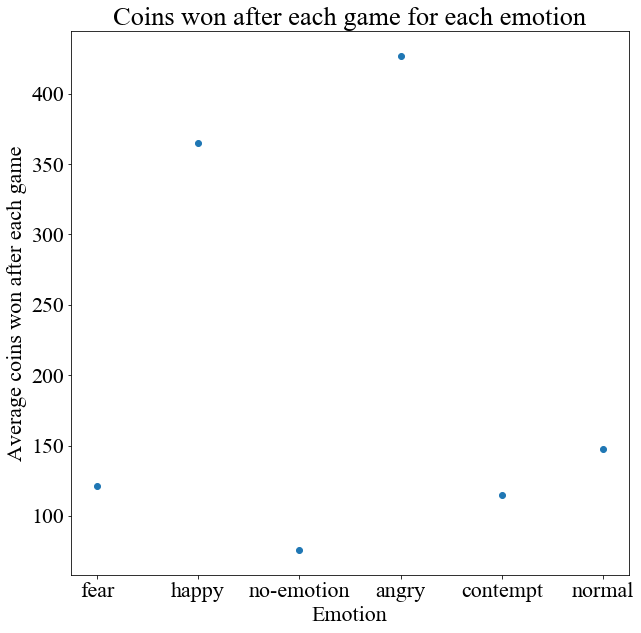

In [66]:
plt.title('Coins won after each game for each emotion')
plt.xlabel('Emotion')
plt.ylabel('Average coins won after each game')
plt.scatter(x,y)

###### These results are discussed in the results section of the report

In [44]:
games[0]

{'players': [[0, 'contempt', 0.6885378197368472, ['6_♦', '7_♦']],
  [1, 'fear', 0.37130127014137215, ['7_♠', '6_♠']],
  [2, 'normal', 0.06601952079047368, ['A_♦', '6_♣']],
  [3, 'no-emotion', 0.3073808356006582, ['9_♦', 'A_♠']],
  [4, 'fear', 0.10386283921258788, ['2_♣', '3_♠']],
  [5, 'normal', 0.6044541538342094, ['A_♥', 'K_♦']],
  [6, 'fear', 0.009418800167821262, ['K_♠', '3_♣']],
  [7, 'anger', 0.519827779815681, ['8_♠', '2_♦']]],
 'winner': 3,
 'win_moves': {'pre_flop': ['CALL'],
  'flop': ['BET'],
  'turn': ['BET'],
  'river': ['BET']},
 'win_amount': 200,
 'win_hand': ['9_♦', 'A_♠'],
 'win_emotion': 'no-emotion',
 'win_e_power': 0.3073808356006582,
 'win_e_num': 2,
 'community_cards': ['4_♣', 'Q_♦', '6_♥', 'Q_♠', '9_♠'],
 'last_round': 'showdown',
 'debt': 960}